In [1]:
# import Library yang dibutuhkan
import pandas as pd                   #dataframe manipulation
import numpy as np                    #scientific camputing
import seaborn as sns                 #visualization
import matplotlib.pyplot as plt       #visualization
%matplotlib inline
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [23]:
# import csv
uk = pd.read_csv("C:/Users/HP/Desktop/Data Amazon/amz_uk.csv") 

uk.head()

,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [25]:
# Hapus kolom yang tidak digunakan
uk = uk.drop(['imgUrl', 'productURL'], axis=1)

uk.head()

,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [31]:
# Rename kolom
uk = uk.rename(columns = {"asin" : "ID", 
                          "title" : "name",
                         "stars" : "rating",
                         "reviews" : "reviewCount",
                         "boughtInLastMonth" : "quantity"})

uk.head()

,ID,name,rating,reviewCount,price,isBestSeller,quantity,categoryName
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [35]:
# Menunjukkan Duplicates
uk[uk.duplicated()]

,ID,name,rating,reviewCount,price,isBestSeller,quantity,categoryName


In [37]:
# Cek Missing Values
print(uk.isnull().sum())

ID              0
name            0
rating          0
reviewCount     0
price           0
isBestSeller    0
quantity        0
categoryName    0
dtype: int64


In [41]:
'''Yang NaN ga ada, tapi banyak yang 0'''

#Cek dari frekuensi & histogram
uk['quantity'].value_counts()

quantity
0        2061427
50         63601
100        44173
200        17509
300         9523
400         5996
1000        5424
500         4059
600         2815
700         2030
800         1594
2000        1521
900         1320
3000         675
4000         348
5000         227
10000        139
6000         136
7000          91
8000          59
9000          56
20000         14
50000          2
30000          2
40000          1
Name: count, dtype: int64

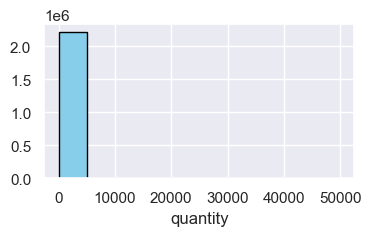

In [55]:
# Histogram untuk memperjelas persebaran data
plt.figure(figsize=(4, 2))
plt.hist(uk['quantity'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('quantity')
plt.show()

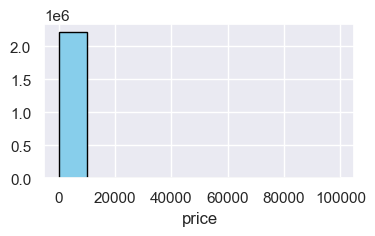

In [69]:
''' Quantity 0 terlalu banyak, akan dihapus '''

# Cek data Price
plt.figure(figsize=(4, 2))
plt.hist(uk['price'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('price')
plt.show()

In [71]:
# Hapus baris di mana kolom 'price' atau 'quantity' mengandung 0
uk = uk[(uk['price'] != 0) & (uk['quantity'] != 0)].dropna()

uk['quantity'].value_counts()

quantity
50       63601
100      44173
200      17509
300       9523
400       5996
1000      5424
500       4059
600       2815
700       2030
800       1594
2000      1521
900       1320
3000       675
4000       348
5000       227
10000      139
6000       136
7000        91
8000        59
9000        56
20000       14
50000        2
30000        2
40000        1
Name: count, dtype: int64

In [73]:
uk.count()

ID              161315
name            161315
rating          161315
reviewCount     161315
price           161315
isBestSeller    161315
quantity        161315
categoryName    161315
dtype: int64

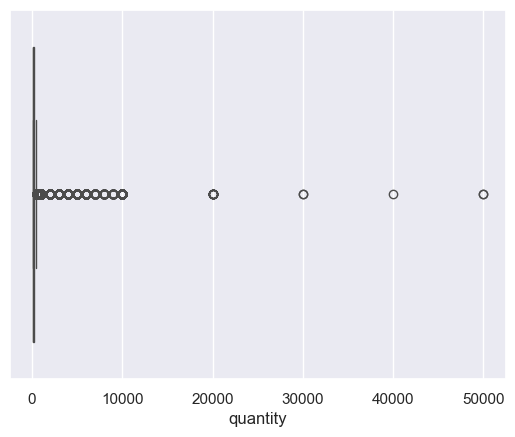

In [87]:
# Cek outlier
sns.boxplot(x=uk['quantity'])
plt.show()

In [103]:
'''range quantity dibatasi 400'''
uk = uk[uk['quantity'] <= 400]
uk.shape

(140802, 8)

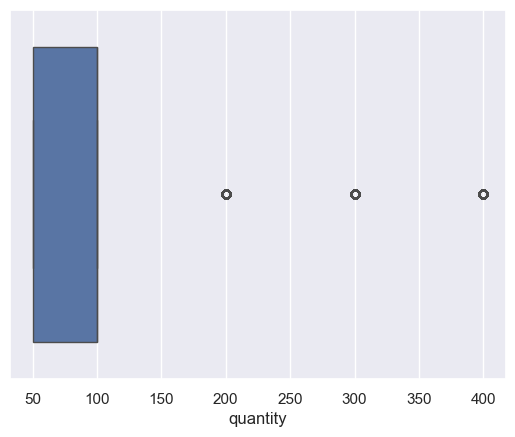

In [107]:
# Setelah outlier quantity dibuang
sns.boxplot(x=uk['quantity'])
plt.show()

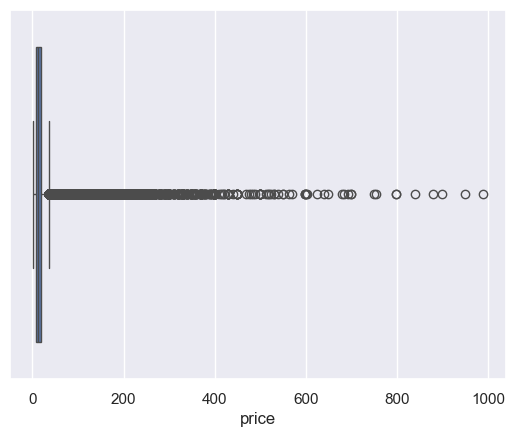

In [109]:
# Cek outlier price
sns.boxplot(x=uk['price'])
plt.show()

In [111]:
uk['price'].value_counts()

price
9.99     6168
6.99     4286
8.99     3978
7.99     3905
5.99     3822
         ... 
72.59       1
52.24       1
37.14       1
44.03       1
49.91       1
Name: count, Length: 5668, dtype: int64

In [115]:
''' Generate new column (City) '''
# Daftar kota populer UK dan probabilitas
cities = ['London', 'Manchester', 'Birmingham', 'Leeds', 'Liverpool', 
          'Glasgow', 'Sheffield', 'Bradford', 'Edinburgh', 'Cardiff']

# Probabilitas untuk setiap kota
probabilities = [0.2, 0.15, 0.12, 0.1, 0.1, 
                 0.08, 0.08, 0.07, 0.05, 0.05]  # Total harus 1

# Tambahkan kolom 'city' dengan nilai random berdasarkan probabilitas
uk['city'] = np.random.choice(cities, size=len(uk), p=probabilities)

uk.head()

,ID,name,rating,reviewCount,price,isBestSeller,quantity,categoryName,city
92,B083K77PZL,"W-KING Bluetooth Speaker, 50W Speakers Wireles...",4.6,2979,65.59,False,200,Hi-Fi Speakers,Manchester
143,B09J47Y789,XSOUND Portable Bluetooth Speaker Wireless 24W...,4.4,804,22.99,False,200,Hi-Fi Speakers,Manchester
160,B08FCDFHLB,"soundcore Anker Mini 3 Bluetooth Speaker, Bass...",4.7,3208,34.99,False,200,Hi-Fi Speakers,Manchester
229,B096TJ6FXD,"HEYSONG Shower Speaker, Waterpoof Portable Blu...",4.3,1279,21.99,False,100,Hi-Fi Speakers,Edinburgh
261,B08ZJ6DQNY,Sony SRS-XB13 Wireless Extra Bass Portable Com...,4.3,15963,39.90,False,100,Hi-Fi Speakers,Leeds


In [119]:
# Export into CSV
uk.to_csv("C:/Users/HP/Desktop/Data Amazon/AmazonUK.csv", index=False)